<a href="https://colab.research.google.com/github/AilingLiu/Growth_Analysis/blob/master/Average_Revenue_Per_Account.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action="ignore")

# Average Revenue Per Account

In [2]:
url='https://github.com/AilingLiu/Growth_Analysis/blob/master/Data/online_retail.csv?raw=true'

def load_data(link=url):
  return pd.read_csv(url, encoding = 'unicode_escape')

def add_features(df):

  if not set(['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice']) <= set(df.columns):
    print('You do not have the needed columns.')
    return df
  
  newdf = df.copy()
  newdf['InvoiceDate']=pd.to_datetime(newdf['InvoiceDate'])
  newdf['InvoiceYM']=newdf['InvoiceDate'].apply(lambda x: x.strftime('%Y%m'))
  newdf['Revenue'] = newdf['UnitPrice'] * newdf['Quantity']
  minyearmonth = newdf.groupby(['CustomerID'])['InvoiceDate'].min().apply(lambda x: x.strftime('%Y%m')).to_frame('MinYearMonth')
  newdf=newdf.join(minyearmonth, on='CustomerID')
  newdf['CustomerType'] = np.where(newdf['InvoiceYM'] == newdf['MinYearMonth'], 'New', 'Exist')
  return newdf

data = load_data()
retail=add_features(data)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYM,Revenue,MinYearMonth,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012,New


In [0]:
gb = retail.groupby(['InvoiceYM'])
arpa=gb.apply(lambda subf: subf['Revenue'].sum()/subf['CustomerID'].nunique()).to_frame('ARPA').round(0)
arpa

,ARPA
InvoiceYM,
201012,790.0
201101,715.0
201102,624.0
201103,670.0
201104,549.0
201105,670.0
201106,658.0
201107,686.0
201108,697.0


Text(0.5, 0, 'Month Year')

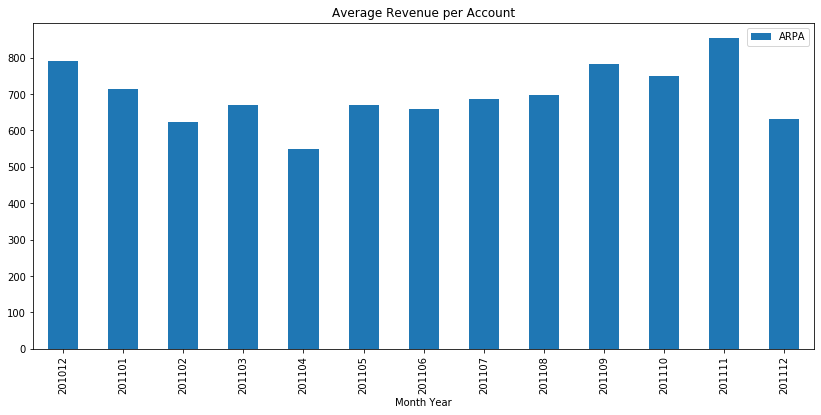

In [0]:
arpa.plot.bar(figsize=(14,6))
plt.title('Average Revenue per Account')
plt.xlabel('Month Year')

> Testing idea:
<br> Assume our ARPA target of 2011 is 700. Did we meet our target in general? 

> Hypotheses:
<br>$H_0$: The 2011 revenue has difference from the theoretical annual average revenue value
<br>$H_a$: The 2011 revenue is lower than the theoretical value

> Testing Method
<br>One sample t test

In [0]:
tval,pval=st.ttest_1samp(arpa['ARPA'], 700)#the return pvalue is two sided
pval/2 #we need the one side only according to our alternative hypothesis

0.4718835453694634

We cannot reject the null hypothesis with such large pvalue. It means the chance to obtain this data is 47.2%, which is quite likely. 

## Averge Revenue per Order

In [0]:
arpo=gb['Revenue'].mean().to_frame('Avg/Order')
arpo

,Avg/Order
InvoiceYM,
201012,17.630400
201101,15.933088
201102,17.976058
201103,18.593313
201104,16.486399
201105,19.533716
201106,18.742830
201107,17.240248
201108,19.348161


In [0]:
#average over year
arpo.mean(axis=0).values[0]

17.973771181458464

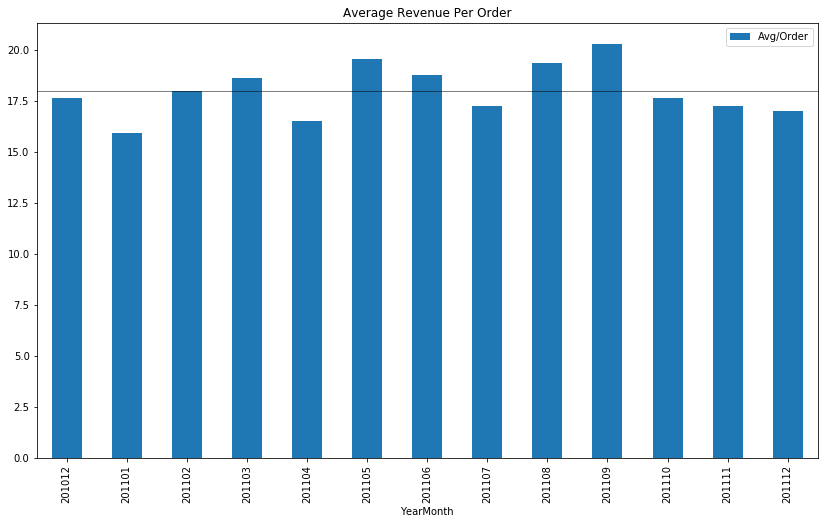

In [0]:
fig, ax=plt.subplots()
arpo.plot.bar(ax=ax, figsize=(14, 8))
plt.xlabel('YearMonth')
plt.title('Average Revenue Per Order')
ax.axhline(arpo.mean(axis=0).values[0], color='k', linewidth=0.5)

In [0]:
plt.plot([])